# Desafio #QuarentenaDados 
**Alura + Data Hackers**

Notebook de João Vitor de Lima.

http://linkedin.com/in/joao-vitor-de-lima-b55071173

Vamos trabalhar com uma amostra aleatória da base de dados MICRODADOS ENEM 2018, essa amostra é diferente da apresentada em aula. Junto com a divulgação do resultado final estaremos disponibilizando o código que gerou os dados para que você possa analisar e reproduzir os datasets.

Seu objetivo é prever da melhor forma possível a nota das provas de linguagens e códigos (NU_NOTA_LC), dado todas as outras notas. O modelo que tiver o menor erro quadrático médio (MSE) vence o desafio.

Para o desafio você tem três bases à disposição, duas para desenvolver seu modelo e uma para submissão da predição. As bases são as seguintes:

dados_treino: São 1500000 linhas contendo a nota das 4 provas + nota de redação.

dados_teste: São 20000 linhas contendo com notas das 4 provas + nota de redação.

dados_desafioqt: São 10000 linhas com nota de 3 provas + nota de redação. A nota da prova de Linguagem e Codigos (NU_NOTA_LC) não está disponível nessa base.

As base dados_treino e dados_teste, contém as seguintes colunas; NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO, NU_NOTA_LC (Você pode consultar a aula 5, onde o Guilherme explica o significado das siglas). A coluna que você deve realizar a previsão é NU_NOTA_LC. Você pode manipular os dados da forma que quiser, o importante é que no final submeta o arquivo com as informações corretas (detalhes da submissão serão discutidos no final deste notebook).

A base dados_desafioqt, contém as seguintes colunas; ID, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO. Repare que os dados NU_NOTA_LC não estão presentes, essa é justamente a informação que você precisa prever. Nós temos os valores reais das notas, no final do prazo de submissão um script irá avaliar sua previsão e dará uma nota para o seu modelo. Nessa base também temos o ID, essa informação é importante para o envio da sua previsão, garanta que a nota prevista corresponda ao respectivo ID.

# Etapa 01: Análise e exploração de dados

# 1.1 Análise dos datasets, verificação de valores NaN, outliers e colunas com nota 0.

Após verificar os dados de cada dataset, tenho como resultado que não existem valores NaN, não existem valores que extrapolem o máximo possível de alcance das notas, mas existem colunas com nota 0, que serão tratados na próxima seção.

In [0]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Carregamento e verificação das bases de dados

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

  1.1.1 Dados de treino

In [0]:
#Visualização dos 5 primeiros valores
dados_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,530.7,586.5,575.9,539.0,520.0
1,439.4,577.9,440.9,488.7,380.0
2,414.1,548.8,417.2,382.6,600.0
3,407.9,572.7,558.9,595.4,560.0
4,617.2,655.7,564.2,660.9,540.0


In [0]:
#Visualização dos principais dados estatísticos do dataset
dados_treino.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,493.890438,570.752255,528.526903,535.615000,516.269867
std,74.154695,79.399706,72.385368,103.033382,184.355231
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,435.800000,513.300000,477.900000,455.500000,360.000000
50%,483.600000,584.900000,533.400000,516.700000,520.000000
75%,542.500000,629.600000,581.400000,600.900000,640.000000
max,869.600000,825.800000,787.400000,996.100000,1000.000000


In [0]:
#Informações sobre colunas, valores e tipos.
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_NOTA_CN       150000 non-null  float64
 1   NU_NOTA_CH       150000 non-null  float64
 2   NU_NOTA_LC       150000 non-null  float64
 3   NU_NOTA_MT       150000 non-null  float64
 4   NU_NOTA_REDACAO  150000 non-null  float64
dtypes: float64(5)
memory usage: 5.7 MB


1.1.2 Dados de teste

In [0]:
#Visualização dos principais dados estatísticos do dataset
dados_teste.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,494.28013,571.214535,527.989935,534.577850,516.192000
std,73.60655,78.452930,72.244443,102.212904,184.972025
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,436.60000,515.100000,477.500000,454.400000,360.000000
50%,484.50000,585.000000,533.300000,516.400000,520.000000
75%,543.20000,629.800000,580.925000,600.200000,640.000000
max,785.00000,840.900000,747.800000,965.000000,980.000000


In [0]:
#Informações sobre colunas, valores e tipos.
dados_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       20000 non-null  float64
 1   NU_NOTA_CH       20000 non-null  float64
 2   NU_NOTA_LC       20000 non-null  float64
 3   NU_NOTA_MT       20000 non-null  float64
 4   NU_NOTA_REDACAO  20000 non-null  float64
dtypes: float64(5)
memory usage: 781.4 KB


1.1.3 Dados do desafio

In [0]:
#Visualização dos principais dados estatísticos do dataset
dados_desafioqt.describe()

,ID,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,493.699120,571.692870,535.307860,515.546000
std,2886.89568,73.512058,78.388181,103.141515,183.814419
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,436.100000,515.400000,455.100000,360.000000
50%,4999.50000,483.650000,586.300000,517.550000,520.000000
75%,7499.25000,542.700000,630.400000,601.000000,620.000000
max,9999.00000,771.100000,776.700000,946.500000,980.000000


In [0]:
#Informações sobre colunas, valores e tipos.
dados_desafioqt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10000 non-null  int64  
 1   NU_NOTA_CN       10000 non-null  float64
 2   NU_NOTA_CH       10000 non-null  float64
 3   NU_NOTA_MT       10000 non-null  float64
 4   NU_NOTA_REDACAO  10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


#1.2 Tratamento e preparação dos datasets.

1.2.1 Colunas com notas 0

Para tratar das colunas com nota zero eu irei fazer os seguintes passos:


1.   Substituir os valores 0 por valores NaN;
2.   Preencher os valores NaN dos datasets pela média de cada nota.




In [0]:
#Substituição dos valores 0 por NaN

dados_treino['NU_NOTA_CN'].replace(0.,np.NAN, inplace=True)
dados_treino['NU_NOTA_CH'].replace(0.,np.NAN, inplace=True)
dados_treino['NU_NOTA_LC'].replace(0.,np.NAN, inplace=True)
dados_treino['NU_NOTA_MT'].replace(0.,np.NAN, inplace=True)
dados_treino['NU_NOTA_REDACAO'].replace(0.,np.NAN, inplace=True)

dados_teste['NU_NOTA_CN'].replace(0.,np.NAN, inplace=True)
dados_teste['NU_NOTA_CH'].replace(0.,np.NAN, inplace=True)
dados_teste['NU_NOTA_LC'].replace(0.,np.NAN, inplace=True)
dados_teste['NU_NOTA_MT'].replace(0.,np.NAN, inplace=True)
dados_teste['NU_NOTA_REDACAO'].replace(0.,np.NAN, inplace=True)


dados_desafioqt['NU_NOTA_CN'].replace(0.,np.NAN, inplace=True)
dados_desafioqt['NU_NOTA_CH'].replace(0.,np.NAN, inplace=True)
dados_desafioqt['NU_NOTA_MT'].replace(0.,np.NAN, inplace=True)
dados_desafioqt['NU_NOTA_REDACAO'].replace(0.,np.NAN, inplace=True)


In [58]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_NOTA_CN       149983 non-null  float64
 1   NU_NOTA_CH       149843 non-null  float64
 2   NU_NOTA_LC       149941 non-null  float64
 3   NU_NOTA_MT       149982 non-null  float64
 4   NU_NOTA_REDACAO  146933 non-null  float64
dtypes: float64(5)
memory usage: 5.7 MB


In [0]:
# Preenchimento dos valores NaN

dados_treino['NU_NOTA_CN'].fillna(dados_treino['NU_NOTA_CN'].mean(), inplace = True)
dados_treino['NU_NOTA_CH'].fillna(dados_treino['NU_NOTA_CH'].mean(), inplace = True)
dados_treino['NU_NOTA_LC'].fillna(dados_treino['NU_NOTA_LC'].mean(), inplace = True)
dados_treino['NU_NOTA_MT'].fillna(dados_treino['NU_NOTA_MT'].mean(), inplace = True)
dados_treino['NU_NOTA_REDACAO'].fillna(dados_treino['NU_NOTA_REDACAO'].mean(), inplace = True)

dados_teste['NU_NOTA_CN'].fillna(dados_teste['NU_NOTA_CN'].mean(), inplace = True)
dados_teste['NU_NOTA_CH'].fillna(dados_teste['NU_NOTA_CH'].mean(), inplace = True)
dados_teste['NU_NOTA_LC'].fillna(dados_teste['NU_NOTA_LC'].mean(), inplace = True)
dados_teste['NU_NOTA_MT'].fillna(dados_teste['NU_NOTA_MT'].mean(), inplace = True)
dados_teste['NU_NOTA_REDACAO'].fillna(dados_teste['NU_NOTA_REDACAO'].mean(), inplace = True)

dados_desafioqt['NU_NOTA_CN'].fillna(dados_desafioqt['NU_NOTA_CN'].mean(), inplace = True)
dados_desafioqt['NU_NOTA_CH'].fillna(dados_desafioqt['NU_NOTA_CH'].mean(), inplace = True)
dados_desafioqt['NU_NOTA_MT'].fillna(dados_desafioqt['NU_NOTA_MT'].mean(), inplace = True)
dados_desafioqt['NU_NOTA_REDACAO'].fillna(dados_desafioqt['NU_NOTA_REDACAO'].mean(), inplace = True)

In [60]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_NOTA_CN       150000 non-null  float64
 1   NU_NOTA_CH       150000 non-null  float64
 2   NU_NOTA_LC       150000 non-null  float64
 3   NU_NOTA_MT       150000 non-null  float64
 4   NU_NOTA_REDACAO  150000 non-null  float64
dtypes: float64(5)
memory usage: 5.7 MB


In [61]:
dados_treino.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,493.946419,571.350269,528.734872,535.679282,527.046205
std,73.968036,77.220423,71.622089,102.866163,168.592158
min,362.500000,304.200000,318.800000,364.400000,40.000000
25%,435.800000,513.600000,478.000000,455.500000,380.000000
50%,483.600000,584.900000,533.400000,516.800000,527.046205
75%,542.500000,629.600000,581.400000,600.900000,640.000000
max,869.600000,825.800000,787.400000,996.100000,1000.000000


1.2.2 Escalando e transformando os dados

Nesta seção irei escalar os dados.

Utilizei duas formas, MinMaxScaler e StandardScaler. Irei verificar qual o melhor e usarei no modelo final.

Isso ajuda na melhor compreensão dos dados pelo modelo de machine learning.



In [62]:
#Primeiramente separo a coluna de dados que queremos predizer, das demais colunas.

target_feature_treino = dados_treino['NU_NOTA_LC']
features_treino = dados_treino.drop('NU_NOTA_LC', axis=1)

target_feature_teste = dados_teste['NU_NOTA_LC']
features_teste = dados_teste.drop('NU_NOTA_LC', axis=1)

features_desafioqt = dados_desafioqt.drop('ID', axis=1)

features_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
0,530.7,586.5,539.0,520.0
1,439.4,577.9,488.7,380.0
2,414.1,548.8,382.6,600.0
3,407.9,572.7,595.4,560.0
4,617.2,655.7,660.9,540.0


In [0]:
#Escalando com MinMaxScaler: Permite definir um range para as features.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescaled_features_treino = scaler.fit_transform(features_treino)
rescaled_features_teste = scaler.fit_transform(features_teste)
rescaled_features_desafioqt = scaler.fit_transform(features_desafioqt)

In [64]:
rescaled_features_treino[0:5]

array([[0.33169   , 0.54121933, 0.27639702, 0.5       ],
       [0.15164662, 0.5247316 , 0.19677062, 0.35416667],
       [0.10175508, 0.46894172, 0.02881114, 0.58333333],
       [0.08952869, 0.51476227, 0.36567991, 0.54166667],
       [0.5022678 , 0.67388804, 0.46936837, 0.52083333]])

In [0]:
#Transformando os numpy arrays em dataframes
rescaled_features_treino_df = pd.DataFrame(rescaled_features_treino,columns=features_treino.columns)
rescaled_features_teste_df = pd.DataFrame(rescaled_features_teste,columns=features_teste.columns)
rescaled_features_desafioqt_df = pd.DataFrame(rescaled_features_desafioqt,columns=features_desafioqt.columns)

In [66]:
rescaled_features_treino_df.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.331690,0.541219,0.276397,0.500000
1,0.151647,0.524732,0.196771,0.354167
2,0.101755,0.468942,0.028811,0.583333
3,0.089529,0.514762,0.365680,0.541667
4,0.502268,0.673888,0.469368,0.520833


In [67]:
rescaled_features_treino_df.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.259212,0.512175,0.271140,0.507340
std,0.145865,0.148045,0.162840,0.175617
min,0.000000,0.000000,0.000000,0.000000
25%,0.144547,0.401457,0.144214,0.354167
50%,0.238809,0.538152,0.241254,0.507340
75%,0.354960,0.623850,0.374387,0.625000
max,1.000000,1.000000,1.000000,1.000000


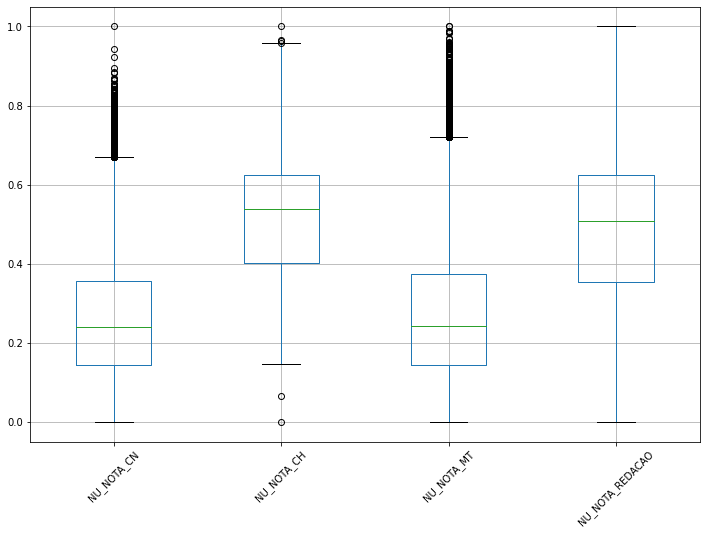

In [68]:
rescaled_features_treino_df.boxplot(figsize=(12,8), rot=45)

plt.show()

In [0]:
#Escalando com  o StandardScaler: Calcula a média de cada feature, diminui a média em cada valor e divide pelo desvio padrão.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()

scaler_treino = scaler.fit(features_treino)
scaler_teste = scaler2.fit(features_teste)
scaler_desafioqt = scaler3.fit(features_desafioqt)

std_features_treino = scaler_treino.transform(features_treino)
std_features_teste = scaler_teste.transform(features_teste)
std_features_desafioqt = scaler_desafioqt.transform(features_desafioqt)

In [70]:
std_features_treino[0:5]

array([[ 0.4968863 ,  0.1961888 ,  0.03228204, -0.04179452],
       [-0.73743476,  0.08481892, -0.45670449, -0.87220365],
       [-1.07947553, -0.29202565, -1.48814525,  0.43272498],
       [-1.1632958 ,  0.017479  ,  0.58056912,  0.19546523],
       [ 1.66631425,  1.09232778,  1.21732095,  0.07683536]])

In [71]:
#Transformando os numpy arrays em dataframes

std_features_treino_df = pd.DataFrame(std_features_treino, columns=features_treino.columns)
std_features_teste_df = pd.DataFrame(std_features_teste, columns=features_teste.columns)
std_features_desafioqt_df = pd.DataFrame(std_features_desafioqt, columns=features_desafioqt.columns)


std_features_treino_df.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.496886,0.196189,0.032282,-0.041795
1,-0.737435,0.084819,-0.456704,-0.872204
2,-1.079476,-0.292026,-1.488145,0.432725
3,-1.163296,0.017479,0.580569,0.195465
4,1.666314,1.092328,1.217321,0.076835


In [72]:
std_features_treino_df.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO
count,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,-1.458315e-16,1.184589e-15,-3.446340e-16,1.068060e-15
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.777076e+00,-3.459592e+00,-1.665075e+00,-2.888912e+00
25%,-7.861046e-01,-7.478651e-01,-7.794550e-01,-8.722036e-01
50%,-1.398774e-01,1.754688e-01,-1.835331e-01,6.743328e-16
75%,6.564152e-01,7.543332e-01,6.340368e-01,6.699847e-01
max,5.078610e+00,3.295120e+00,4.475935e+00,2.805322e+00


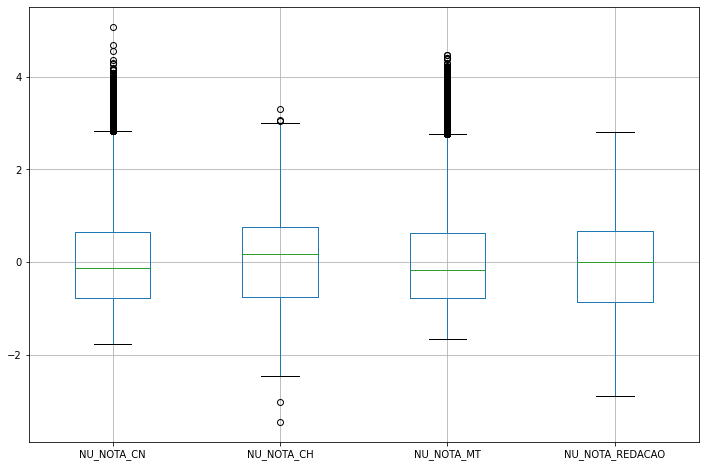

In [73]:
std_features_treino_df.boxplot(figsize=(12,8))
plt.show()

# Etapa 02: Modelo de machine learning

# 2.1 Escolha do modelo

Como é um problema que busca descobrir um valor numérico, os principais modelos, que eu conheço, para encontrar regressões são:

1. LinearRegression;
2. LinearSVR;
3. DecisionTreeRegressor.

(Rodei um modelo de RandomForestRegressor que durou mais de 20 minutos. Como não conheço muito bem, decidi remover.)

Vou testar cada um deles e verificar o modelo que tem o menor erro quadrático médio, a partir dos dados de teste.

Então, utilizarei o melhor modelo para prever os dados do desafio.

2.1.1 Treinamento dos modelos

In [0]:
#Importação das bibliotecas

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [0]:
# 1.LinearRegression

lmodel = LinearRegression()
lmodel2 = LinearRegression()

#1.1 LR com dados escalados com o MinMaxScaler

lmodel.fit(rescaled_features_treino_df,target_feature_treino)
rescaled_predict_lmodel = lmodel.predict(rescaled_features_teste_df)

#1.2 LR com dados escalados com o StandardScaller

lmodel2.fit(std_features_treino_df,target_feature_treino)
std_predict_lmodel = lmodel.predict(std_features_teste_df)

In [0]:
# 2.LinearSVR

lsvr_model = LinearSVR(C =1.0 ,max_iter=5000)
lsvr_model2 = LinearSVR(C = 1.0, max_iter=5000)

#2.1 LSVR com dados escalados com o MinMaxScaler

lsvr_model.fit(rescaled_features_treino_df, target_feature_treino)
rescaled_predict_lsvr = lsvr_model.predict(rescaled_features_teste_df)

#2.2 LSVR com dados escalados com o StandardScaler

lsvr_model2.fit(std_features_treino_df, target_feature_treino)
std_predict_lsvr2 = lsvr_model2.predict(std_features_teste_df)

In [0]:
#3 DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model2 = DecisionTreeRegressor()

#3.1 DTR com os dados escalados com o MinMaxScaler

dtr_model.fit(rescaled_features_treino_df, target_feature_treino)
rescaled_predict_dtr = dtr_model.predict(rescaled_features_teste_df)

#3.2 DTR com os dados escalados com o StandardScaler

dtr_model2.fit(std_features_treino_df, target_feature_treino)
std_predict_dtr = dtr_model2.predict(std_features_teste_df)

2.1.2 Verificação dos modelos

O melhor modelo, ou seja, com menor erro quadrado médio, foi o algoritmo **LinearSVR** com os dados escalados pelo **StandardScaler**.

Nome do modelo: lsvr_model2

Base de dados que será utilizada: std_features_desafioqt



In [0]:
#Importação da biblioteca

from sklearn.metrics import mean_squared_error

In [0]:
# 1.LinearRegression

mse_res_plm = mean_squared_error(target_feature_teste, rescaled_predict_lmodel)
mse_std_plm = mean_squared_error(target_feature_teste, std_predict_lmodel)

mse_lmodel = [mse_res_plm, mse_std_plm]

In [80]:
mse_lmodel

[2408.1222394033284, 126445.19465281667]

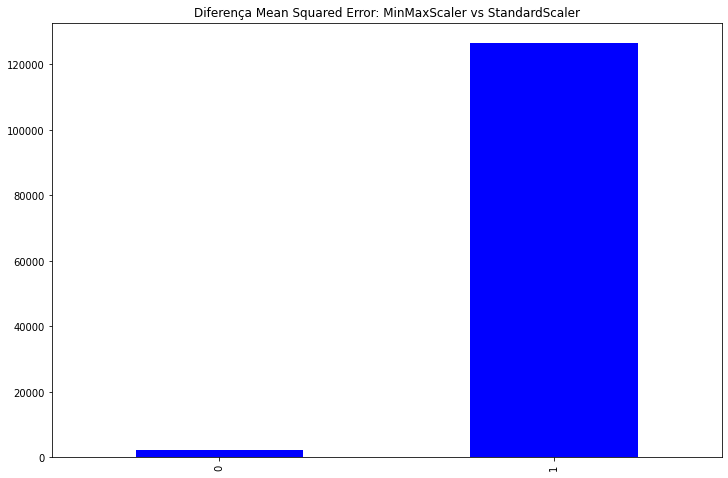

In [81]:
mse_lmodel_df = pd.DataFrame(mse_lmodel)
mse_lmodel_df.plot(kind='bar', figsize=(12,8), legend=False, title='Diferença Mean Squared Error: MinMaxScaler vs StandardScaler',color=['b'])

In [0]:
# 2.LinearSVR

mse_res_plsvr = mean_squared_error(target_feature_teste, rescaled_predict_lsvr)
mse_std_plsvr = mean_squared_error(target_feature_teste, std_predict_lsvr2)

mse_lsvr = [mse_res_plsvr, mse_std_plsvr]

In [83]:
mse_lsvr

[2386.2615620861075, 2145.43995514811]

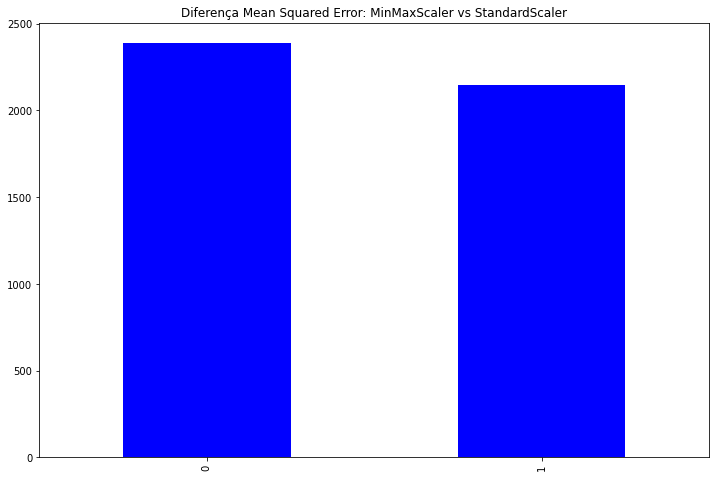

In [84]:
mse_lsvr_df = pd.DataFrame(mse_lsvr)
mse_lsvr_df.plot(kind='bar', figsize=(12,8), legend=False, title='Diferença Mean Squared Error: MinMaxScaler vs StandardScaler',color=['b'])

In [0]:
# 3.DecisionTreeRegressor

mse_res_pdtr = mean_squared_error(target_feature_teste, rescaled_predict_dtr)
mse_std_pdtr = mean_squared_error(target_feature_teste, std_predict_dtr)

mse_dtr = [mse_res_pdtr, mse_std_pdtr]

In [86]:
mse_dtr

[5214.828513158253, 4175.663109271347]

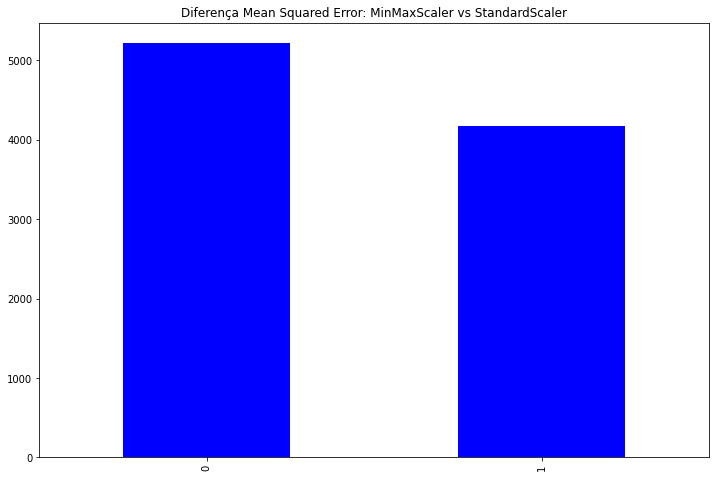

In [87]:
mse_dtr_df = pd.DataFrame(mse_dtr)
mse_dtr_df.plot(kind='bar', figsize=(12,8), legend=False, title='Diferença Mean Squared Error: MinMaxScaler vs StandardScaler',color=['b'])

# 2.2 Predição dos dados e finalização do desafio.

Nessa seção, vou predizer os dados do dataset desafioqt, utilizando o melhor modelo que consegui construir nesse projeto.

Então, criarei o arquivo com os resultados para serem enviados e validados pelos criadores do desafio.

In [0]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

MODELO = lsvr_model2
X_desafioqt = std_features_desafioqt
predicao_desafioqt = MODELO.predict(X_desafioqt)


desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df['NU_NOTA_LC'] = predicao_desafioqt

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')